In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
df = pd.read_csv('CountriesoftheWorld.csv')

In [4]:
df.rename(index=str, columns={"Area (sq. mi.)": "Area"},  inplace = True)
df.rename(index=str, columns={"GDP ($ per capita)": "GDP"},  inplace = True)
df.rename(index=str, columns={"Literacy (%)": "Literacy"},  inplace = True)
df.rename(index=str, columns={"Crops (%)": 'Crops'},  inplace = True)
df.head()

,Country,Region,Population,Area,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP,Literacy,Phones (per 1000),Arable (%),Crops,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


               Population      Area  Net migration       GDP  Literacy
Population       1.000000  0.718871      -0.167891  0.063911  0.136290
Area             0.718871  1.000000      -0.258964  0.096416  0.215452
Net migration   -0.167891 -0.258964       1.000000  0.682377  0.313653
GDP              0.063911  0.096416       0.682377  1.000000  0.449120
Literacy         0.136290  0.215452       0.313653  0.449120  1.000000


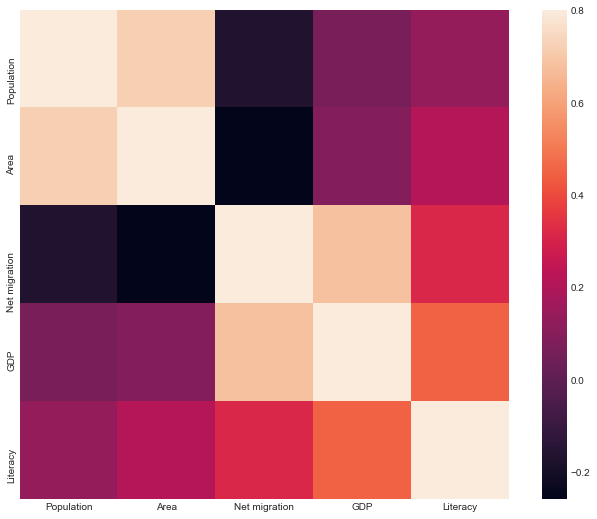

In [5]:
sns.set_style("white")
df['Region'] = df['Region'].str.strip()
df['Country'] = df['Country'].str.strip()

df_Euro = df.loc[
    ((df['Region'] == 'WESTERN EUROPE') | (df['Region'] == 'EASTERN EUROPE')),
    ['Country','Population', 'Area', 'Net migration', 'GDP','Literacy']]

corrmat = df_Euro.corr()

print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


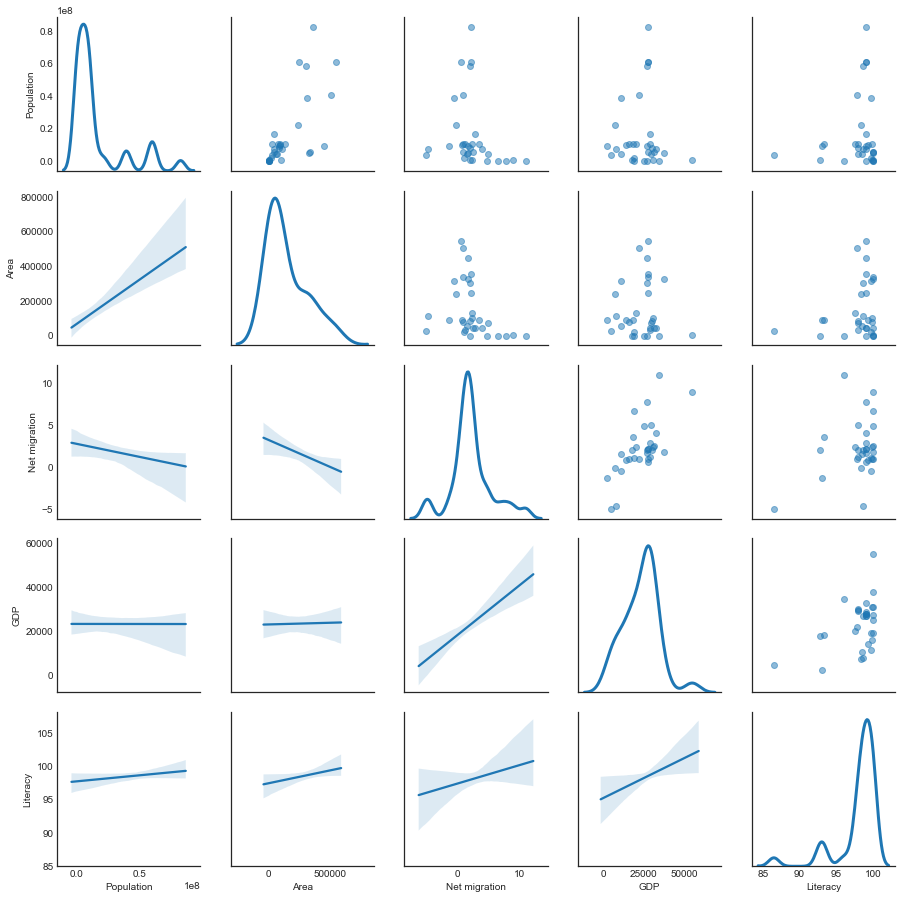

In [6]:
df_jittered = df_Euro.loc[:, 'Net migration':'GDP'].dropna()
# Making the random noise.

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_Euro.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [7]:
features = pd.get_dummies(df['Country'])

# Nordic countries dummy.
features['Nordic'] = np.where((df['Country'].isin(['Sweden', 'Norway', 'Finland', 'Iceland', 'Denmark'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['Country']))

Country  Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
Nordic                                                                    
0                  1        1        1               1        1       1   
1                  0        0        0               0        0       0   

Country  Anguilla  Antigua & Barbuda  Argentina  Armenia    ...     Vanuatu  \
Nordic                                                      ...               
0               1                  1          1        1    ...           1   
1               0                  0          0        0    ...           0   

Country  Venezuela  Vietnam  Virgin Islands  Wallis and Futuna  West Bank  \
Nordic                                                                      
0                1        1               1                  1          1   
1                0        0               0                  0          0   

Country  Western Sahara  Yemen  Zambia  Zimbabwe  
Nordic                

In [8]:
features['Pop_over10million'] = np.where(df['Population']>=10000000, 1, 0)

# Check to make sure it worked.
print(df['Population'].groupby(features['Pop_over10million']).describe())

                   count          mean           std         min         25%  \
Pop_over10million                                                              
0                  148.0  2.630497e+06  2.962809e+06      7026.0    155805.5   
1                   79.0  7.765482e+07  1.911446e+08  10175014.0  16312840.0   

                          50%         75%           max  
Pop_over10million                                        
0                   1188580.5   4526937.0  9.981334e+06  
1                  28287147.0  61768343.5  1.313974e+09  


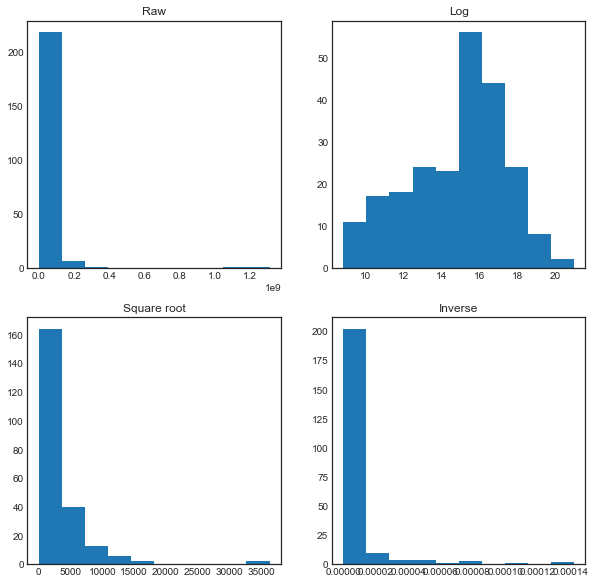

In [9]:
plt.figure(figsize=(10, 10))


plt.subplot(2,2,1)
plt.hist(df['Population'].dropna())
plt.title('Raw')

plt.subplot(2,2,2)
plt.hist(np.log(df['Population'].dropna()))
plt.title('Log')

plt.subplot(2,2,3)
plt.hist(np.sqrt(df['Population'].dropna()))
plt.title('Square root')

plt.subplot(2,2,4)
plt.hist(1/df['Population'].dropna())
plt.title('Inverse')
plt.show()


features['log_pop'] = np.log(df['Population'])

In [10]:
df_pca = df.loc[
    ((df['Region'] == 'WESTERN EUROPE') | (df['Region'] == 'EASTERN EUROPE')),
    ['Net migration','GDP','Literacy']
].dropna()


# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[1.03225806 0.70423412 0.32377049]
 [0.70423412 1.03225806 0.46360752]
 [0.32377049 0.46360752 1.03225806]]


In [12]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.5988017 ]
 [-0.63822051]
 [-0.4838503 ]]
Eigenvalue 1: 2.044468128721471
----------------------------------------
Eigenvector 2: 
[[-0.63938039]
 [ 0.74476491]
 [-0.19109666]]
Eigenvalue 2: 0.3087178885068616
----------------------------------------
Eigenvector 3: 
[[-0.48231654]
 [-0.19493539]
 [ 0.85403217]]
Eigenvalue 3: 0.7435881763200534
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.66019283 0.09969015 0.24011702]


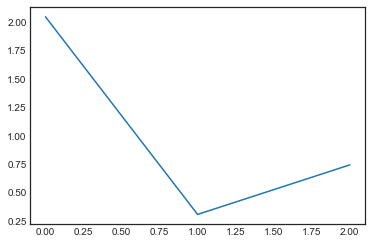

In [13]:
plt.plot(eig_val_cov)
plt.show()

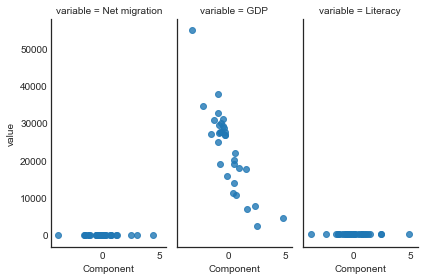

In [15]:
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['Net migration','GDP','Literacy']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()